<a href="https://colab.research.google.com/github/GeorgeEngland/Kaggle-Notebooks/blob/main/Top_6_Percent_titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train = train_data.copy().iloc[0:800]
val = train_data.copy().iloc[800:]
test = test_data.copy()


In [ ]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)
val.drop(['PassengerId'],axis=1,inplace=True)
pred = train_data.iloc[0:800]['Survived']
pred_val = train_data.iloc[800:]['Survived']

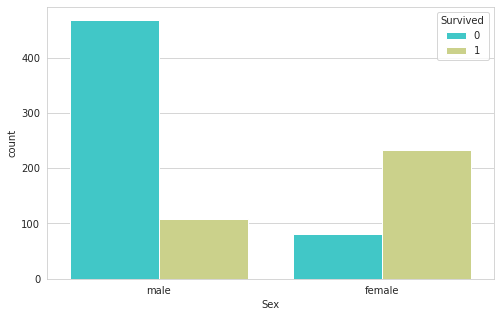

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'Sex',hue='Survived',data=train_data,palette='rainbow')

In [ ]:
sex1 = pd.get_dummies(train['Sex'])
sexVal = pd.get_dummies(val['Sex'])
sex2 = pd.get_dummies(test['Sex'])

train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)
val.drop(['Sex'],axis=1, inplace=True)

train = pd.concat([train,sex1],axis=1)
test = pd.concat([test,sex2],axis=1)
val = pd.concat([val,sexVal],axis=1)

val.drop(['female'],axis=1,inplace=True) 
train.drop(['female'],axis=1,inplace=True) 
test.drop(['female'],axis=1,inplace=True) 

In [ ]:
test.head(5)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1
3,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0


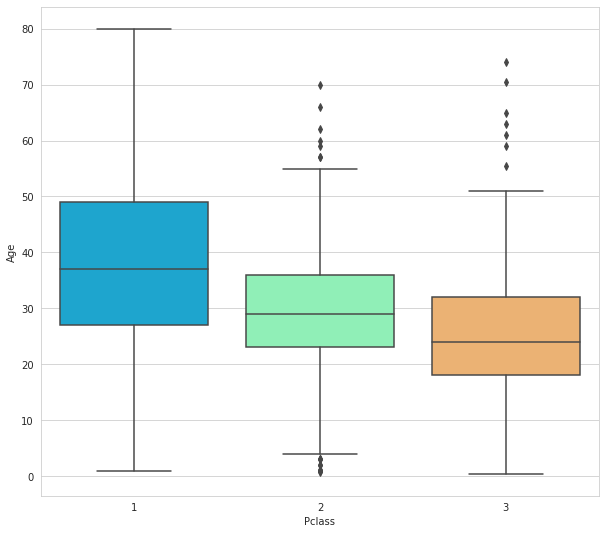

In [ ]:
plt.figure(figsize=(10, 9))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='rainbow')

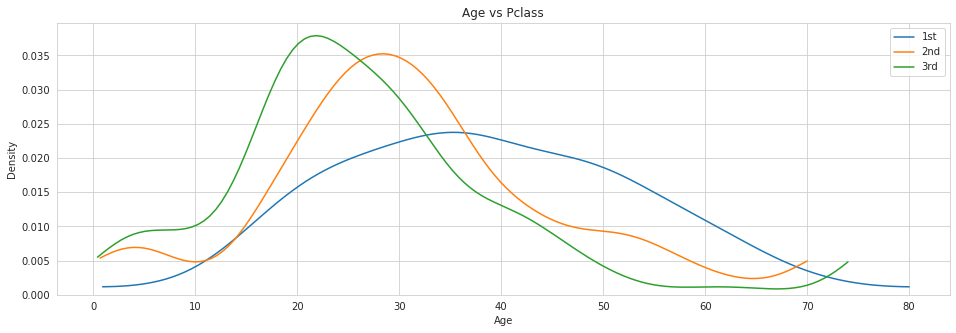

In [ ]:
plt.figure(figsize=(16, 5))
for x in [1,2,3]:    ## for 3 classes
    sns.kdeplot(data=train_data.Age[train_data.Pclass == x],cut = 0, clip=(0,2000))
    
plt.title("Age vs Pclass")
plt.legend(("1st","2nd","3rd"))
plt.xlabel("Age")
plt.ylabel("Density")
train["Age"].fillna(train['Age'].describe().loc[['50%']][0], inplace = True) 
test["Age"].fillna(test['Age'].describe().loc[['50%']][0], inplace = True) 
val["Age"].fillna(val['Age'].describe().loc[['50%']][0], inplace = True) 

In [ ]:
test["Fare"].fillna(test['Fare'].describe().loc[['50%']][0], inplace = True) 


In [ ]:
train["Embarked"].fillna("S", inplace = True) 
val["Embarked"].fillna("S", inplace = True) 
test["Embarked"].fillna("S", inplace = True) 

In [ ]:
embark1 = pd.get_dummies(train['Embarked'])
embarkval = pd.get_dummies(val['Embarked'])
embark2 = pd.get_dummies(test['Embarked'])

train.drop(['Embarked'],axis=1,inplace=True)
val.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)

train = pd.concat([train,embark1],axis=1)
val = pd.concat([val,embarkval],axis=1)
test = pd.concat([test,embark2],axis=1)

In [ ]:
def fam(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

train['Family'] = train.apply(fam, axis = 1)
test['Family'] = test.apply(fam, axis = 1)
val['Family'] = val.apply(fam, axis = 1)

In [ ]:
train = train.drop(['SibSp','Parch'],axis=1)
val = val.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis=1)

In [ ]:
#train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])
#test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'] ])
#val["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in val['Cabin'] ])
val['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in val['Cabin'] ])

val


,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,male,C,Q,S,Family
800,0,2,"Ponesell, Mr. Martin",34.00,250647,13.0000,NaN,1,0,0,1,0
801,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",31.00,C.A. 31921,26.2500,NaN,0,0,0,1,1
802,1,1,"Carter, Master. William Thornton II",11.00,113760,120.0000,NaN,1,0,0,1,1
803,1,3,"Thomas, Master. Assad Alexander",0.42,2625,8.5167,NaN,1,1,0,0,1
804,1,3,"Hedman, Mr. Oskar Arvid",27.00,347089,6.9750,NaN,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.00,211536,13.0000,NaN,1,0,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",19.00,112053,30.0000,NaN,0,0,0,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",27.00,W./C. 6607,23.4500,NaN,0,0,0,1,1
889,1,1,"Behr, Mr. Karl Howell",26.00,111369,30.0000,NaN,1,1,0,0,0


<Figure size 576x360 with 0 Axes>

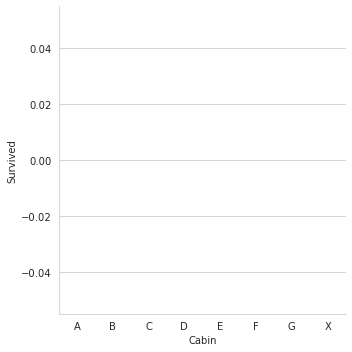

In [ ]:
plt.figure(figsize=(8, 5))
g = sns.catplot(y="Survived",x="Cabin",data=val,kind="bar",order=['A','B','C','D','E','F','G','X'])

In [ ]:
train["Cabin"] = train["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
train["Cabin"] = train["Cabin"].astype(int)
test["Cabin"] = test["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
test["Cabin"] = test["Cabin"].astype(int)
val["Cabin"] = val["Cabin"].map({"X":0, "A":1, "B" : 2 , "C":3, "D":4, "E":5, "F":6, "G":7,"T":0})
val["Cabin"] = val["Cabin"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
train_title = [i.split(",")[1].split(".")[0].strip() for i in train["Name"]]
train["Title"] = pd.Series(train_title)
test_title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test_title)
val_title = [i.split(",")[1].split(".")[0].strip() for i in val["Name"]]
val["Title"] = pd.Series(val_title)

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)
val = val.drop(['Name'],axis=1)

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
val = val.drop(['Cabin'],axis=1)

,Survived,Pclass,Age,Ticket,Fare,male,C,Q,S,Family,Title
800,0,2,34.00,250647,13.0000,1,0,0,1,0,NaN
801,1,2,31.00,C.A. 31921,26.2500,0,0,0,1,1,NaN
802,1,1,11.00,113760,120.0000,1,0,0,1,1,NaN
803,1,3,0.42,2625,8.5167,1,1,0,0,1,NaN
804,1,3,27.00,347089,6.9750,1,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,211536,13.0000,1,0,0,1,0,NaN
887,1,1,19.00,112053,30.0000,0,0,0,1,0,NaN
888,0,3,27.00,W./C. 6607,23.4500,0,0,0,1,1,NaN
889,1,1,26.00,111369,30.0000,1,1,0,0,0,NaN


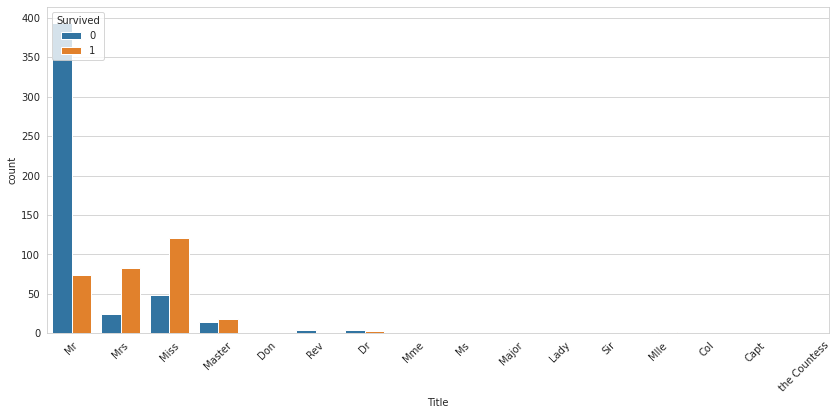

In [ ]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="Title",hue='Survived',data=train)
g = plt.setp(g.get_xticklabels(), rotation=45) 
val

In [ ]:
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train["Title"] = train["Title"].astype(int)
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)
val["Title"] = val["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
val["Title"] = val["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
val["Title"] = val["Title"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:

train.drop(['Ticket'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)
val.drop(['Ticket'],axis=1,inplace=True)

train.drop(['Title'],axis=1,inplace=True)
test.drop(['Title'],axis=1,inplace=True)
val.drop(['Title'],axis=1,inplace=True)

In [ ]:
train.drop(['Survived'],axis=1,inplace=True)
val.drop(['Survived'],axis=1,inplace=True)

train.head(5)

,Pclass,Age,Fare,male,C,Q,S,Family
0,3,22.0,7.2500,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1
2,3,26.0,7.9250,0,0,0,1,0
3,1,35.0,53.1000,0,0,0,1,1
4,3,35.0,8.0500,1,0,0,1,0


In [ ]:
print(train.isnull().sum())
print(val.isnull().sum())


Pclass    0
Age       0
Fare      0
male      0
C         0
Q         0
S         0
Family    0
dtype: int64
Pclass    0
Age       0
Fare      0
male      0
C         0
Q         0
S         0
Family    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train2 = sc.fit_transform(train)
val = sc.fit_transform(val)
test2 = sc.transform(test)

In [ ]:
#val = train2[800:]
#val_pred = pred[800:]

#train2 = train2[:800]
#pred = train2[:800]

###train = train[:800]



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          xgb.XGBClassifier(n_estimators=100),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    print(train.shape,pred.shape)
    KFold_Score[classifiers[j]] = (cross_val_score(model, train, np.ravel(pred), scoring = 'accuracy', cv=cv))
    j = j+1
    

(800, 8) (800,)
(800, 8) (800,)
(800, 8) (800,)
(800, 8) (800,)
(800, 8) (800,)
(800, 8) (800,)
(800, 8) (800,)
(800, 8) (800,)


In [ ]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = True)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
KNeighborsClassifier,0.65625,0.60000,0.69375,0.68125,0.67500,0.66125
Radial SVM,0.71250,0.62500,0.68125,0.71875,0.61875,0.67125
LogisticRegression,0.76250,0.74375,0.83125,0.80000,0.77500,0.78250
Linear SVM,0.76875,0.76875,0.82500,0.80000,0.78125,0.78875
RandomForestClassifier,0.85000,0.73125,0.80625,0.80625,0.81250,0.80125
AdaBoostClassifier,0.82500,0.75625,0.84375,0.78750,0.80000,0.80250
XGBoostClassifier,0.86250,0.75000,0.85000,0.79375,0.79375,0.81000
GradientBoostingClassifier,0.86250,0.78125,0.83750,0.85000,0.80000,0.82625


In [ ]:
rfc = RandomForestClassifier(random_state=0)


In [ ]:
param_grid = { 
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train2,pred )
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
rfc1=RandomForestClassifier(random_state=0, n_estimators= 300, criterion = 'gini',max_features = 'auto',max_depth = 8)
rfc1.fit(train2, pred)

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=0)

In [ ]:
pred2= rfc1.predict(test2)
from sklearn.metrics import accuracy_score
val_pred = rfc1.predict(val)
accuracy_score(val_pred,train_data.iloc[800:]['Survived'])


0.8131868131868132

In [ ]:
pred_test = pred2
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_test})
output.to_csv('./submission.csv', index=False)

In [ ]:
print(np.array(train_data['Survived']))
val

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

array([], shape=(0, 10), dtype=float64)